<a href="https://colab.research.google.com/github/Sanil2108/machine-learning-and-computer-vision/blob/master/BehaviouralCloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/Sanil2108/Track1_selfdrivingcardata

Cloning into 'Track1_selfdrivingcardata'...
remote: Enumerating objects: 17383, done.
remote: Counting objects: 100% (17383/17383), done.
remote: Compressing objects: 100% (17383/17383), done.
remote: Total 17383 (delta 0), reused 17383 (delta 0), pack-reused 0
Receiving objects: 100% (17383/17383), 256.38 MiB | 14.03 MiB/s, done.
Checking out files: 100% (17380/17380), done.


In [0]:
!ls Track1_selfdrivingcardata/

driving_log.csv  IMG


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, Dense, Flatten, MaxPooling2D, Dropout
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa

Using TensorFlow backend.


In [0]:
data_dir = 'Track1_selfdrivingcardata'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(data_dir, 'driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/sanil/Desktop/IMG/center_2018_12_15_17_52_11_746.jpg,/home/sanil/Desktop/IMG/left_2018_12_15_17_52_11_746.jpg,/home/sanil/Desktop/IMG/right_2018_12_15_17_52_11_746.jpg,0.0,0.0,0.0,0.000082
1,/home/sanil/Desktop/IMG/center_2018_12_15_17_52_11_861.jpg,/home/sanil/Desktop/IMG/left_2018_12_15_17_52_11_861.jpg,/home/sanil/Desktop/IMG/right_2018_12_15_17_52_11_861.jpg,0.0,0.0,0.0,0.000084
2,/home/sanil/Desktop/IMG/center_2018_12_15_17_52_11_977.jpg,/home/sanil/Desktop/IMG/left_2018_12_15_17_52_11_977.jpg,/home/sanil/Desktop/IMG/right_2018_12_15_17_52_11_977.jpg,0.0,0.0,0.0,0.000080
3,/home/sanil/Desktop/IMG/center_2018_12_15_17_52_12_087.jpg,/home/sanil/Desktop/IMG/left_2018_12_15_17_52_12_087.jpg,/home/sanil/Desktop/IMG/right_2018_12_15_17_52_12_087.jpg,0.0,0.0,0.0,0.000081
4,/home/sanil/Desktop/IMG/center_2018_12_15_17_52_12_201.jpg,/home/sanil/Desktop/IMG/left_2018_12_15_17_52_12_201.jpg,/home/sanil/Desktop/IMG/right_2018_12_15_17_52_12_201.jpg,0.0,0.0,0.0,0.000078


In [0]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

In [0]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_12_15_17_52_11_746.jpg,left_2018_12_15_17_52_11_746.jpg,right_2018_12_15_17_52_11_746.jpg,0.0,0.0,0.0,0.000082
1,center_2018_12_15_17_52_11_861.jpg,left_2018_12_15_17_52_11_861.jpg,right_2018_12_15_17_52_11_861.jpg,0.0,0.0,0.0,0.000084
2,center_2018_12_15_17_52_11_977.jpg,left_2018_12_15_17_52_11_977.jpg,right_2018_12_15_17_52_11_977.jpg,0.0,0.0,0.0,0.000080
3,center_2018_12_15_17_52_12_087.jpg,left_2018_12_15_17_52_12_087.jpg,right_2018_12_15_17_52_12_087.jpg,0.0,0.0,0.0,0.000081
4,center_2018_12_15_17_52_12_201.jpg,left_2018_12_15_17_52_12_201.jpg,right_2018_12_15_17_52_12_201.jpg,0.0,0.0,0.0,0.000078


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


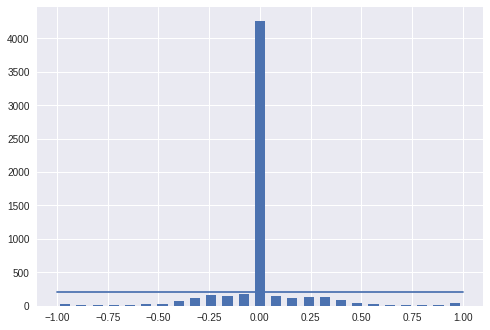

In [0]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
print(bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
plt.show()

total 5793
removed 4057
1736


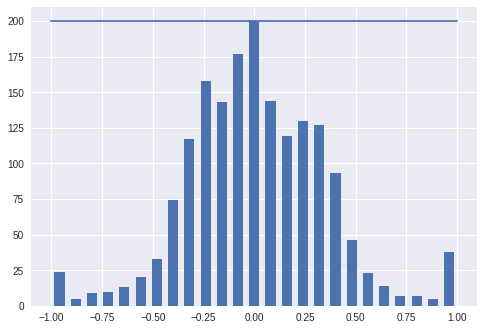

In [0]:
print('total', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
  
print('removed', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print(len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
plt.show()

In [0]:
data.iloc[1]

center      center_2018_12_15_17_52_13_228.jpg
left        left_2018_12_15_17_52_13_228.jpg  
right       right_2018_12_15_17_52_13_228.jpg 
steering   -0.406674                          
throttle    0.66519                           
reverse     0                                 
speed       0.948273                          
Name: 13, dtype: object

In [0]:
def load_image_steering(datadir, df):
  image_path = []
  steerings = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steerings.append(float(indexed_data[3]))
  image_path = np.asarray(image_path)
  steerings = np.asarray(steerings)
  
  return image_path, steerings

In [0]:
image_paths, steerings = load_image_steering(data_dir + '/IMG', data)

In [0]:
steerings

array([-0.0633781, -0.4066737, -0.7532337, ...,  0.       ,  0.       ,
        0.       ])

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=0)

In [0]:
print(X_train)

['Track1_selfdrivingcardata/IMG/center_2018_12_15_17_53_33_481.jpg'
 'Track1_selfdrivingcardata/IMG/center_2018_12_15_17_55_42_885.jpg'
 'Track1_selfdrivingcardata/IMG/center_2018_12_15_17_55_25_007.jpg' ...
 'Track1_selfdrivingcardata/IMG/center_2018_12_15_18_02_31_682.jpg'
 'Track1_selfdrivingcardata/IMG/center_2018_12_15_17_55_43_561.jpg'
 'Track1_selfdrivingcardata/IMG/center_2018_12_15_17_56_27_874.jpg']


Text(0.5,1,'validation set')

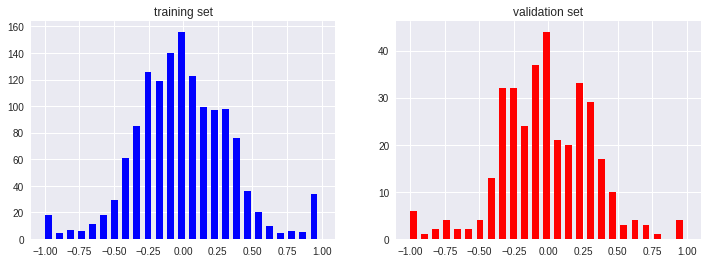

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('training set')

axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('validation set')

In [0]:
def zoom(img):
  zoom = iaa.Affine(scale=(1, 1.3))
  img = zoom.augment_image(img)
  return img

In [0]:
def pan(img):
  pan = iaa.Affine(translate_percent={"x":(-0.1, 0.1), "y":(-0.1, 0.1)})
  img = pan.augment_image(img)
  return img

In [0]:
def img_random_brightness(img):
  brightness = iaa.Multiply((0.2, 1.2))
  img = brightness.augment_image(img)
  return img

In [0]:
def img_random_flip(img, steering_angle):
  img = cv2.flip(img, 1)
  steering_angle = -steering_angle
  return img, steering_angle

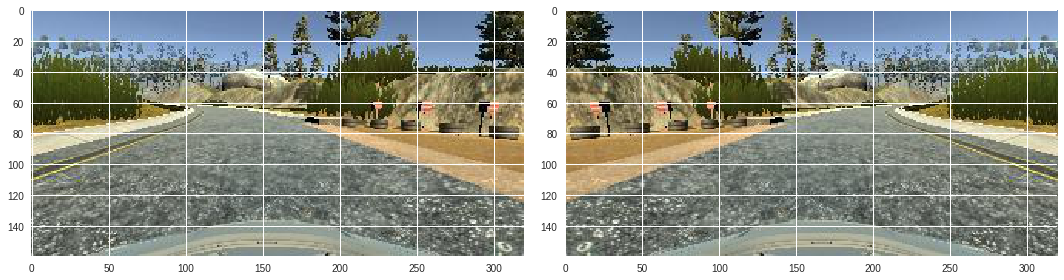

In [0]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
original_image = mpimg.imread(image)
steering_angle = steerings[random_index]

flip_image, flip_steering_angle = img_random_flip(original_image, steering_angle)

fig, axes= plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[1].imshow(flip_image)

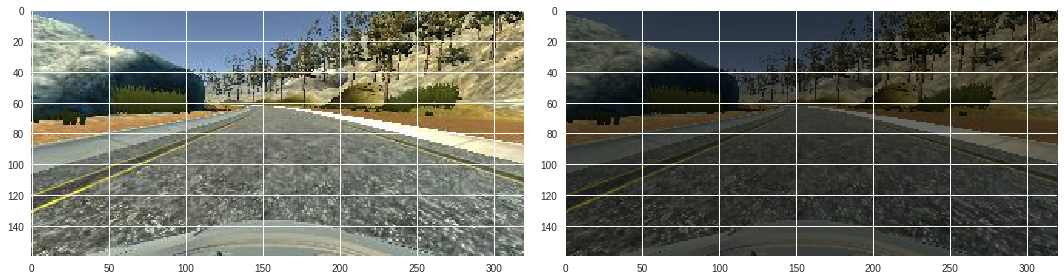

In [0]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
# zoomed_image = zoom(original_image)
panned_image = pan(original_image)
bright_image = img_random_brightness(original_image)
fig, axes= plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[1].imshow(bright_image)

In [0]:
def random_augment(img, steering_angle):
  image = mpimg.imread(img)
  if(np.random.rand()<0.5):
    image = pan(image)
  if(np.random.rand()<0.5):
    image = zoom(image)
  if(np.random.rand()<0.5):
    image = img_random_brightness(image)
  if(np.random.rand()<0.5):
    image, steering_angle = img_random_flip(image, steering_angle)
  return image, steering_angle
  

In [0]:
fig, axes = plt.subplots(10, 2, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  rand_num = random.randint(0, len(image_paths)-1)
  random_image = image_paths[rand_num]
  random_steering = steerings[rand_num]
  
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
  
  axes[i][0].imshow(original_image)
  axes[i][0].set_title('Original')
  axes[i][1].imshow(augmented_image)
  axes[i][0].set_title('Augmented')

In [0]:
def img_pre_process(img):
#   img = mpimg.imread(img)
  img = img[60:135 , :,:]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3, 3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

In [0]:
def batch_generator(image_paths, steering_angles, batch_size, istraining):
  while(True):
    batch_img = []
    batch_steerings_list = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_angles[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_angles[random_index]
        
      im = img_pre_process(im)
      batch_img.append(im)
      batch_steerings_list.append(steering)
      
    yield (np.asarray(batch_img), np.asarray(batch_steerings_list))

In [0]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

In [0]:
plt.imshow(X_train[0])

Text(0.5,1,'Pre processed image')

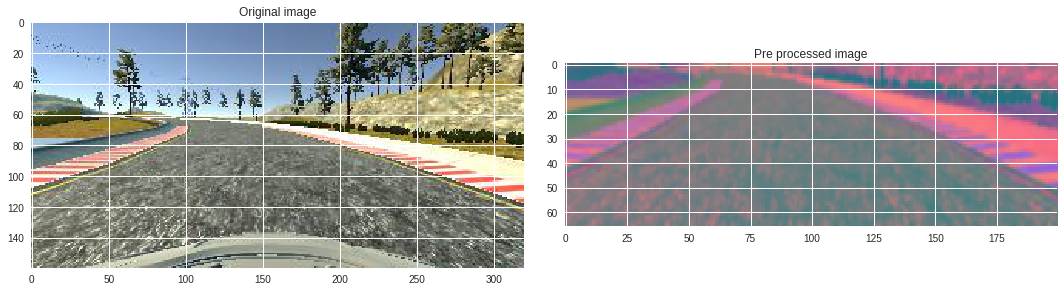

In [0]:
img = image_paths[100]
original_image = mpimg.imread(img)
preproccessed_img = img_pre_process(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original image')
axes[1].imshow(preproccessed_img)
axes[1].set_title('Pre processed image')

In [0]:
# def img_pre_process2(img):
#   img = mpimg.imread(img)
#   img = img[60:135 , :,:]
#   img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
#   img = cv2.GaussianBlur(img, (3, 3), 0)
#   img = cv2.resize(img, (200, 66))
#   img = img/255
#   return img

# X_train = np.array(list(map(img_pre_process2, X_train)))
# X_valid = np.array(list(map(img_pre_process2, X_valid)))

(1388, 66, 200, 3)


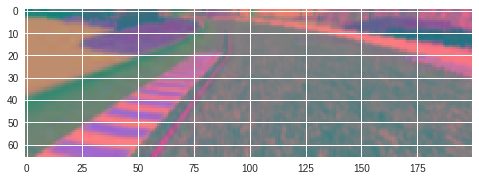

In [0]:
plt.imshow(X_train[1])
print(X_train.shape)

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
#   model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(50, activation='elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(10, activation='elu'))
#   model.add(Dropout(0.5))
  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer)
  
  return model
  

In [0]:
model = nvidia_model()
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               115300    
__________

In [0]:
history = model.fit_generator(
    batch_generator(X_train, y_train, 100, 1), 
    steps_per_epoch=300, 
    epochs=10, 
    validation_data=batch_generator(X_valid, y_valid, 100, 0), 
    validation_steps=200,  
    verbose=1, 
    shuffle=1)

Epoch 1/10
300/300 [==============================] - 179s 598ms/step - loss: 0.1072 - val_loss: 0.0597
Epoch 2/10
300/300 [==============================] - 174s 580ms/step - loss: 0.0870 - val_loss: 0.0557
Epoch 3/10
300/300 [==============================] - 174s 581ms/step - loss: 0.0807 - val_loss: 0.0524
Epoch 4/10
300/300 [==============================] - 174s 579ms/step - loss: 0.0771 - val_loss: 0.0472
Epoch 5/10
300/300 [==============================] - 174s 579ms/step - loss: 0.0721 - val_loss: 0.0436
Epoch 6/10
300/300 [==============================] - 174s 580ms/step - loss: 0.0679 - val_loss: 0.0433
Epoch 7/10
300/300 [==============================] - 174s 580ms/step - loss: 0.0618 - val_loss: 0.0398
Epoch 8/10
300/300 [==============================] - 174s 581ms/step - loss: 0.0615 - val_loss: 0.0402
Epoch 9/10
300/300 [==============================] - 174s 580ms/step - loss: 0.0580 - val_loss: 0.0378
Epoch 10/10
300/300 [==============================] - 173s 578m

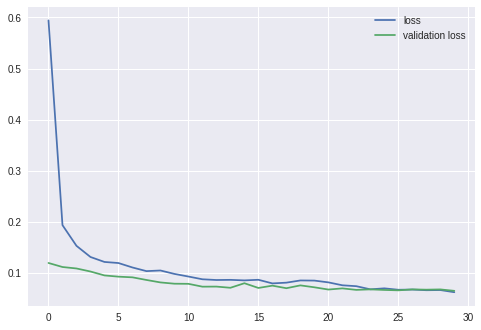

In [0]:
ffplt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation loss'])

In [0]:
model.save('model.h5')
from google.colab import files
files.download('model.h5')

In [0]:
!pip3 install imgaug